## EXERCISE 1: Weather's probability
You are given a (fake) <a href="https://drive.google.com/file/d/1LjZLE9ozaHcBwiCl90mHaS1nXKcglfr4/view">padua_weather.csv</a>
of historical records for Padua's weather. The weather, which can be either rainy (= 1 in the dataset), misty (= 2), or sunny (= 3), is reported for each day of the week, for a whole year (52 weeks).

After you formalised the problem (i.e. identify the random variables and necessary mathematical formulae), write a Python program that reads the dataset and computes the following:
- probability of being sunny during the weekend (one or both days);
- expected weather for each day of the week (*);
- supposed you don't know which day of the week is today: although very unrealistic, how could you guess which day is today based only on the weather?

(\*) An expected value of, for example, 2.5 can be interpreted as "a mix of misty and sunny weather".
 



In [ ]:
import csv
from google.colab import drive
import collections as c
import numpy as np

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#probability sunny weekend
with open('drive/MyDrive/padua_weather.csv', newline='') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    line_cont=0
    s=[]
    d=[]
    for row in data:
      #print(row)
      if line_cont!=0:
        s.append(row[5])
        d.append(row[6])
      line_cont+=1

    count=0

    for i in range(0,len(d)):
      if d[i]=='3' or s[i]=='3':
        count+=1

    prob=count/len(d)
    print(prob)

0.4423076923076923


In [ ]:
#weather excpeted each day
with open('drive/MyDrive/padua_weather.csv', newline='') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    line_cont=0
    s=[]
    for row in data:
      if line_cont!=0:
         s.append(row[0])
      line_cont+=1

    count1=0
    count2=0
    count3=0

    for i in range(0,len(s)):
      if s[i]=='3':
        count3+=1
      elif s[i]=='1':
        count1+=1
      elif s[i]=='2':
        count2+=1

    print(count1)
    print(count2)
    print(count3)
    ex=count3*3/len(s)+count2*2/len(s)+count1/len(s)
    print(ex)

17
14
21
2.076923076923077


In [ ]:
#what day is it given it rain p(x|r)=p(r|x)p(x)/p(r)
with open('drive/MyDrive/padua_weather.csv', newline='') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    line_cont=0
    day = c.defaultdict(list)
    listdays=["Monday","Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"]
    for row in data:
      if line_cont!=0:
        cont=0
        for i in listdays:
          day[i].append(row[cont])
          cont+=1
      line_cont+=1

    total_counts=0
    CountRain=[0,0,0,0,0,0,0]

    for j in range(0,len(listdays)):
      for i in day[listdays[j]]:
        if i=='1':
          CountRain[j]+=1
          total_counts+=1

    pr=total_counts/(line_cont*7)
    for i in range(0,7):
      print(str(i)+" "+str(((CountRain[i]/line_cont)*(1/7))/pr))



0 0.1240875912408759
1 0.13868613138686128
2 0.1167883211678832
3 0.13868613138686128
4 0.13868613138686128
5 0.14598540145985403
6 0.1970802919708029


## EXERCISE 2: Broad Street cholera outbreak

The following is a simplified version of an example in Judea Pearl's *The Book of Why*. It refers to a case of cholera epidemic, caused by contaminated water, which killed hundreds of people in London between 1853 and 1854. The diagram below illustrates some of the key factors explaining this epidemic, in particular:
- $X$ indicates whether the water company's intake was downstream of the London's sewers;
- $W$ indicates whether the water was contaminated or not;
- $Z$ indicates the presence of other external factors (e.g. poverty, miasma, etc.);
- $Y$ indicates the outbreak of cholera.

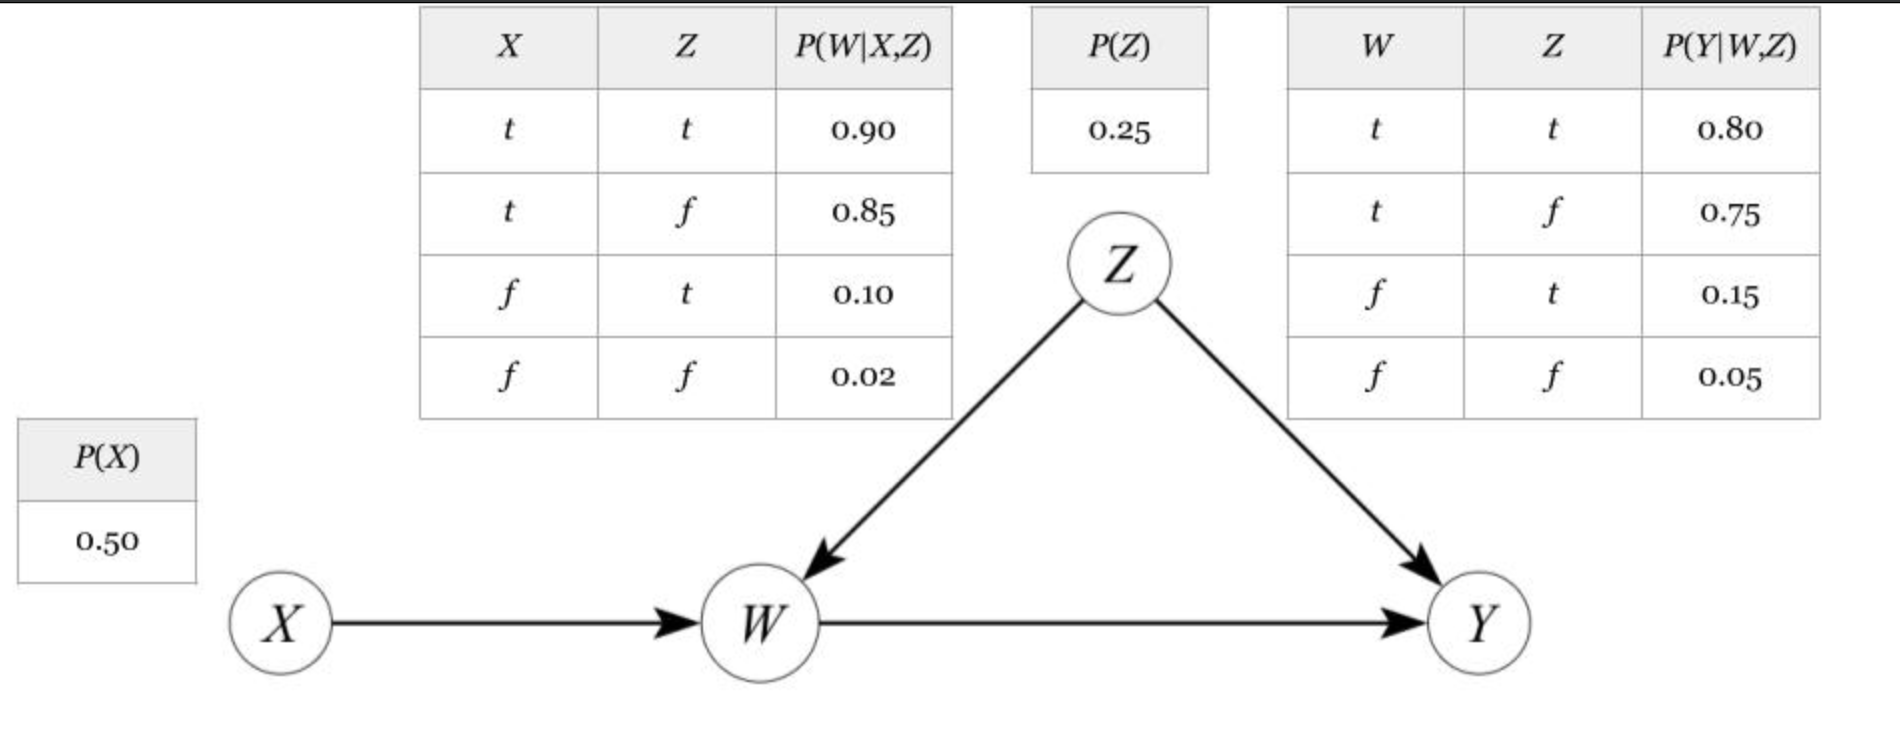

(please note the probabilities in the diagram are fake)

> - Formalise the problem using opportune mathematical notations and derive an expression for computing the probability distribution of the cholera given that the water company's intake is upstream (i.e. what is the query? how can it be decomposed?)
> - Write a Python program that computes the actual probabilities of the above distribution using the information from the given CPTs.

In [ ]:
t,f=0,1

x=0.5

z=np.array([0.25,0.75])

y_wz=np.array([[[0.8,0.75],[0.15,0.05]],[[0.2,0.25],[0.85,0.95]]])

w_notxz=np.array([[0.10,0.02],[0.90,0.98]])

#print(str(w_notxz[:,t])+" "+str(z[t])+" "+str(w_notxz[:,f]))
#print("Prove")
#print(w_notxz[t,:])
#print("-------")
#print(y_wz[:,t,:])
#print("-------")
#sum w
pW_z=w_notxz[t,:]*y_wz[:,t,:]+w_notxz[f,:]*y_wz[:,f,:]
print("sum of w",pW_z)

#print("------")
#print(pW_z[:,t])
#print("------")
#print(z[t])
#sum z
pR=pW_z[:,t]*z[t]+pW_z[:,f]*z[f]
print("sum of z",pR)

#*x
risBNorm=pR*x
print("Before norm",risBNorm)

#normalize
ris=(1/(risBNorm[t]+risBNorm[f]))*risBNorm
print("Result:",ris)

#normalize 2
ris2=(1/(pR[0]+pR[1]))*pR
print("without x: ", ris2)

sum of w [[0.215 0.064]
 [0.785 0.936]]
sum of z [0.10175 0.89825]
Before norm [0.050875 0.449125]
Result: [0.10175 0.89825]
without x:  [0.10175 0.89825]
